### Treść zadania

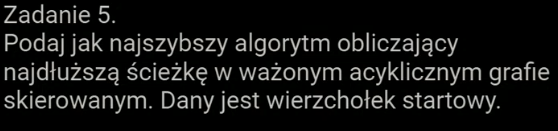

# Sposób I
### (Dynamiczny)

### Omówienie

Wagi krawędzi traktujemy jako odległości.
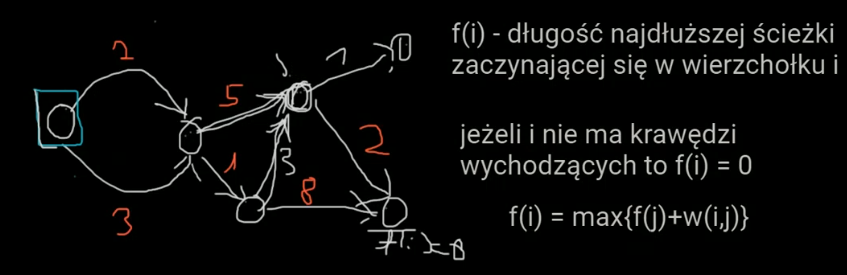

### Złożoność

###### Obliczeniowa: 
$ O(e) $, gdzie $ e $ to liczba krawędzi (dla 2. i 3. implementacji) <br>
$ O(v^2 + e) $, gdzie $ e $ to liczba krawędzi, a $ v $ to liczba wierzchołków (dla 1. implementacji) (bo mamy tablicę o rozmiarze $ v \times v $, ale zapamiętujemy obliczone długości ścieżek, więc nie liczymy dla każdego wierzchołka ścieżki od nowa. Stąd $ + e $, bo tylko $ e $ razy będziemy przechodzić przez $ e $ krawędzi).
###### Pamięciowa:
$ O(e + v) $ - $ e $, bo tyle maksymalnie zejść rekurencji będziemy mieli (tyle, ile krawędzi), $ v $, bo takiej wielkości tablicę na zapisywanie najlepszych ścieżek tworzymy. (w przypadku 1. implementacji dochodzi jeszcze pamięć na reprezentację grafu, która jest dość spora w porównaniu z implementacjami 2. i 3., ale zakładamy, że wielkość pamięci, potrzebnej na reprezentację grafu, nie wchodzi do pamięci potrzebnej do działania algorytmu - ten graf już jest utworzony i algorytmm wyznaczający ścieżkę, nie tworzy go na nowo).

### Reprezentacja grafu

Zaimplementujemy algorytm dla poniższych reprezentacji grafu:


### Implementacja #1
##### Dla macierzowej reprezentacji grafu

In [15]:
def longest_path(G):
    n = len(G)
    F = [0] * n
    
    def recur(i):
        if i == n: return 0
        if not F[i]:  
            for j in range(n):
                if G[i][j]:
                    # If there are multiple edges from 'i' vertex to 'j' vertex,
                    # choose an edge of the max value
                    max_edge = max(G[i][j])
                    F[i] = max(F[i], recur(j) + max_edge)
        print(i, F)
        return F[i]
        
    # We have to start from every vertex separately as the longest path
    # doesn't have to start from the first vertex or the first vertex might
    # be not connected with some of other vertices
    for i in range(n):
        recur(i)
        
    return max(F)

###### Kilka testów

In [16]:
G = [
    [[], [2, 3], [], [], [], []],
    [[], [], [5], [], [1], []],
    [[], [], [], [1], [], [2]],
    [[], [], [], [], [], []],
    [[], [], [3], [], [], [8]],
    [[], [], [], [], [], []]
]

print(longest_path(G))

3 [0, 0, 0, 0, 0, 0]
5 [0, 0, 1, 0, 0, 0]
2 [0, 0, 2, 0, 0, 0]
2 [0, 7, 2, 0, 0, 0]
5 [0, 7, 2, 0, 5, 0]
4 [0, 7, 2, 0, 8, 0]
1 [0, 9, 2, 0, 8, 0]
0 [12, 9, 2, 0, 8, 0]
1 [12, 9, 2, 0, 8, 0]
2 [12, 9, 2, 0, 8, 0]
3 [12, 9, 2, 0, 8, 0]
4 [12, 9, 2, 0, 8, 0]
5 [12, 9, 2, 0, 8, 0]
12


### Implementacja #2
##### Dla obiektowej reprezentacji grafu

Zauważmy, że ten sposób implementacji ma zasadniczy problem - indeksy wierzchołków muszą być takie same jak ich indeksy w tablicy $ V $. Jeszcze jedno, cały graf jest reprezenowany przez tablicę wierzchołków, a to nie jest najlepsze rozwiązanie.

In [17]:
class Vertex:
    def __init__(self, index):
        self.index = index
        self.vertices = []
        
    def add_edge(self, target, weight):
        self.vertices.append((target, weight))
        
        
def longest_path(V: 'array of vertices from a graph'):
    n = len(V)
    F = [0] * n
    
    def recur(v):
        if not v.vertices: return 0
        if not F[v.index]:
            max_length = 0
            for u, weight in v.vertices:
                max_length = max(max_length, recur(u) + weight)
            F[v.index] = max_length
        print(v.index, F)
        return F[v.index]
        
    for v in V:
        recur(v)
        
    print(F)
        
    return max(F)

###### Kilka testów

In [18]:
V = [Vertex(i) for i in range(6)]
V[0].add_edge(V[1], 2)
V[0].add_edge(V[1], 3)
V[1].add_edge(V[2], 5)
V[1].add_edge(V[4], 1)
V[2].add_edge(V[3], 1)
V[2].add_edge(V[5], 2)
V[4].add_edge(V[2], 3)
V[4].add_edge(V[5], 8)

print(longest_path(V))

2 [0, 0, 2, 0, 0, 0]
2 [0, 0, 2, 0, 0, 0]
4 [0, 0, 2, 0, 8, 0]
1 [0, 9, 2, 0, 8, 0]
1 [0, 9, 2, 0, 8, 0]
0 [12, 9, 2, 0, 8, 0]
1 [12, 9, 2, 0, 8, 0]
2 [12, 9, 2, 0, 8, 0]
4 [12, 9, 2, 0, 8, 0]
[12, 9, 2, 0, 8, 0]
12


### Implementacja #3
##### Dla obiektowej reprezentacji grafu z użyciem słowników

Jest to najlepsza implementacja (porównując z powyżsyzmi), bo graf jest reprezentowany przez jeden obiekt, który przechowuje wszystkie informacje. Łatwe jest również dodawanie wierzchołków niepołączonych krawędzią lub dodawanie krawędzi.

In [19]:
from collections import defaultdict


class Vertex:
    def __init__(self, index):
        self.index = index
        self.vertices = defaultdict(list)

        
class Graph:
    def __init__(self):
        self.vertices = {}
        
    def __len__(self):
        return len(self.vertices)
        
    def add_vertex(self, index):
        self.vertices[index] = Vertex(index)
        
    def add_edge(self, begin_idx, end_idx, weight):
        self.vertices[begin_idx].vertices[end_idx].append(weight)
        
        
def longest_path(G: 'Graph class instance'):
    n = len(G)
    # Use defaultdict as we are not sure all the vertives will have indices
    # lower than n and greater than 0 (we can give them indices which we want)
    F = defaultdict(int)
    
    def recur(v):
        if not v.vertices: return 0
        if not F[v.index]:
            for u_idx, w in v.vertices.items():
                max_edge = max(w)
                F[v.index] = max(F[v.index], recur(G.vertices[u_idx]) + max_edge)
        return F[v.index]
        
    for v in G.vertices.values():
        recur(v)
        
    return max(F.values())

###### Kilka testów

In [20]:
G = Graph()
for i in range(6): G.add_vertex(i)
G.add_edge(0, 1, 2)
G.add_edge(0, 1, 3)
G.add_edge(1, 2, 5)
G.add_edge(1, 4, 1)
G.add_edge(2, 3, 1)
G.add_edge(2, 5, 2)
G.add_edge(4, 2, 3)
G.add_edge(4, 5, 8)

print(longest_path(G))

12


## (Dodatkowo) Pobieranie ścieżki
#### Będziemy zwracać indeksy kolejno odwiedzanych na ścieżce wierzchołków grafu

### Implementacja #1
##### Dla macierzowej reprezentacji grafu

In [21]:
def get_path(G, F, N):
    n = len(F)
    # Find an index of the beginning node
    max_begin = 0
    for i in range(1, n):
        if F[i] > F[max_begin]:
            max_begin = i      
    # Loop iver next nodes array and store indices of nodes
    # which were included in the path of the max length
    path = []
    i = max_begin
    while N[i] is not None:
        path.append((i, N[i], max(G[i][N[i]])))
        i = N[i]
        
    return path
        
    
def longest_path(G):
    n = len(G)
    F = [0] * n
    N = [None] * n
    
    def recur(i):
        if i == n: return 0
        if not F[i]:  
            for j in range(n):
                if G[i][j]:
                    # If there are multiple edges from 'i' vertex to 'j' vertex,
                    # choose an edge of the max value
                    curr_max = recur(j) + max(G[i][j])
                    if curr_max > F[i]:
                        F[i] = curr_max
                        N[i] = j
#         print(i, F)
        return F[i]
        
    # We have to start from every vertex separately as the longest path
    # doesn't have to start from the first vertex or the first vertex might
    # be not connected with some of other vertices
    for i in range(n):
        recur(i)
        
#     print(N)
    # Restore the path of a max sum
    path = get_path(G, F, N)  # We will also print a weight of an adge
    result = [str(path[0][0])]
    for _, j, w in path:
        result.append(f' --({w})-> {j}')
    
    return ''.join(result)

###### Kilka testów

In [22]:
G = [
    [[], [2, 3], [], [], [], []],
    [[], [], [5], [], [1], []],
    [[], [], [], [1], [], [2]],
    [[], [], [], [], [], []],
    [[], [], [3], [], [], [8]],
    [[], [], [], [], [], []]
]

print(longest_path(G))

0 --(3)-> 1 --(1)-> 4 --(8)-> 5


###### Kolejne implementacje są analogiczne, więc je pomijam.

# Sposób II
### (Z użyciem algorytmów grafowych)

### Wstęp

W przypadku grafów warto jest wykorzystać algorytmy grafowe, ktore omawiane są dopiero w następnej sekcji (po algorytmach dynamicznych i zachłannych). Nie zmienia to faktu, iż po zdobyciu odpowiedniej wiedzy z materiału, dotyczącego grafów, możemy wrócić do tego zadania i rozwiązać je w mądrzejszy sposób, osiągając niższą złożoność obliczeniową.

### Opis rozwiązania

Ponieważ na wejściu otrzymujemy graf acykliczny skierowany (tzw. DAG), możemy skorzystać z algorytmu sortowania topologicznego. Pozwoli nam to wyznaczyć odpowiednią kolejność wierzchołków, w której będziemy przeglądać kolejne wierzchołki oraz krawędzie z nich wychodzące, zapisując dla każdego wierzchołka najdłuższą ścieżkę, jaka do niego prowadzi. Jako wynik zwracamy maksimum ze wszystkich długości, ponieważ graf jest grafem ważonym, więc najdłuższa ścieżka może prowadzić do wierzchołka, który spradzaliśmy wcześniej od ostatnio sprawdzanego.

### Złożoność

###### Obliczeniowa
$ O(V + E) $
###### Pamięciowa
$ O(V) $ - nie liczę miejsca potrzebnego na zapisanie grafu w pamięci (uważam, że graf jest dany)

### Implementacja

In [23]:
def topological_sort(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    result = [None] * n
    idx = n
    
    def dfs(u):
        visited[u] = True
        for v, _ in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal idx
        idx -= 1
        result[idx] = u
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return result


def longest_path(G: 'graph represented using adjacency lists'):
    n = len(G)
    inf = float('inf')
    dist = [-inf] * n
    t_sorted = topological_sort(G)
    dist[t_sorted[0]] = 0
    
    for u in t_sorted:
        for v, weight in G[u]:
            curr_dist = dist[u] + weight
            if curr_dist > dist[v]:
                dist[v] = curr_dist
                
    return max(dist)

###### Kilka testów

##### Pomocnicze

In [24]:
def directed_weighted_graph_list(E: 'array of edges'):
    n = 0
    for i in range(len(E)):
        n = max(n, E[i][0], E[i][1])
    n += 1
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append((edge[1], edge[2]))
    return G

##### Testy

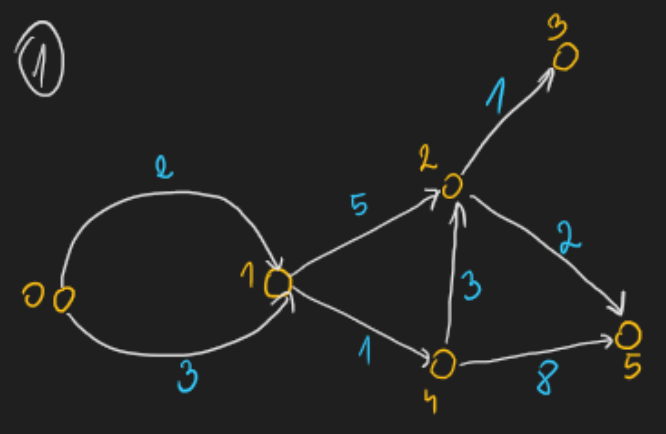

In [25]:
E = [(0, 1, 2), (0, 1, 3), (1, 2, 5), (2, 3, 1), (1, 4, 1), (4, 2, 3), (4, 5, 8), (2, 5, 2)]
G = directed_weighted_graph_list(E)

print(longest_path(G))

12


### (Dodatkowo) Odtwarzanie najdłuższej ścieżki
##### (Ze zwracaniem listy kolejnych krawędzi - bo mogą być krawędzie wielokrotne)

In [30]:
def topological_sort(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    result = [None] * n
    idx = n
    
    def dfs(u):
        visited[u] = True
        for v, _ in G[u]:
            if not visited[v]:
                dfs(v)
        nonlocal idx
        idx -= 1
        result[idx] = u
        
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    return result


def get_path(parents, t):
    path = []
    
    v = t
    entry = parents[t]
    while entry:
        u, weight = entry
        path.append((u, v, weight))
        entry = parents[u]
        v = u
        
    path.reverse()
    return path


def longest_path(G: 'graph represented using adjacency lists'):
    n = len(G)
    inf = float('inf')
    dist = [-inf] * n
    parents = [None] * n
    t_sorted = topological_sort(G)
    dist[t_sorted[0]] = 0
    
    for u in t_sorted:
        for v, weight in G[u]:
            curr_dist = dist[u] + weight
            if curr_dist > dist[v]:
                dist[v] = curr_dist
                parents[v] = u, weight
                
    max_i = 0
    for i in range(1, n):
        if dist[i] > max_i:
            max_i = i
            
    return dist[max_i], get_path(parents, max_i)

###### Kilka testów

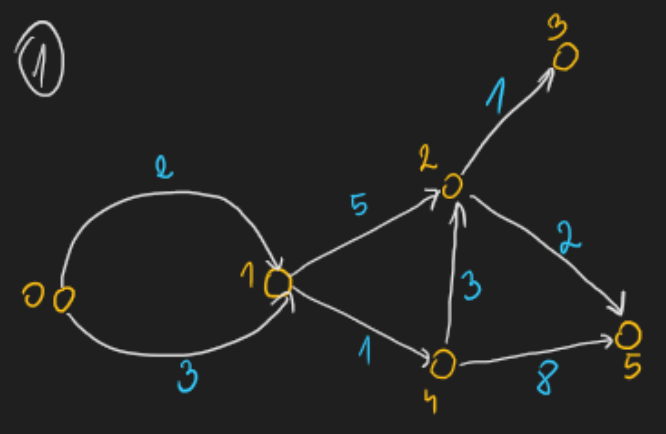

In [31]:
E = [(0, 1, 2), (0, 1, 3), (1, 2, 5), (2, 3, 1), (1, 4, 1), (4, 2, 3), (4, 5, 8), (2, 5, 2)]
G = directed_weighted_graph_list(E)

print(longest_path(G))

(12, [(0, 1, 3), (1, 4, 1), (4, 5, 8)])
